In [1]:
%matplotlib inline
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter

List of sector ETFs:
<ul>
  <li>Healthcare: XLV</li>
  <li>Utilities: XLU</li>
  <li>Consumer Staples: XLP</li>
  <li>Materials: XLB</li>
  <li>Financials: XLF</li>
  <li>Energy: XLE</li>
  <li>Real Estate: XLRE</li>
  <li>Information Technology: XLK</li>
  <li>Consumer Discretionary: XLY</li>
  <li>Communication Services: XLC</li>
  <li>Industrials: XLI</li>
</ul>



In [8]:
ETF_TICKERS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','XLC'] # Enter the ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
etfPxList = yf.download(ETF_TICKERS, START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
etfLogRetList = np.log(etfPxList).diff().dropna()
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis()})
sum_stats # output summary statistics table

[*********************100%%**********************]  11 of 11 completed


,mean,sd,skewness,excess kurtosis
Ticker,,,,
XLB,0.000436,0.015146,-0.549076,9.581289
XLC,0.000466,0.015373,-0.585935,6.643361
XLE,0.000514,0.023138,-0.920075,13.407884
XLF,0.000427,0.016635,-0.600809,14.390613
XLI,0.000452,0.014665,-0.615458,13.275744
XLK,0.000844,0.017308,-0.436733,8.577311
XLP,0.000324,0.010730,-0.481350,16.397449
XLRE,0.000212,0.015802,-1.060660,16.235209
XLU,0.000247,0.014540,-0.162985,14.426669


In [25]:
sum_stats.rank()

,mean,sd,skewness,excess kurtosis
Ticker,,,,
XLB,6.0,5.0,7.0,4.0
XLC,9.0,6.0,6.0,1.0
XLE,10.0,11.0,2.0,7.0
XLF,5.0,9.0,5.0,8.0
XLI,8.0,4.0,4.0,6.0
XLK,11.0,10.0,9.0,3.0
XLP,3.0,1.0,8.0,11.0
XLRE,1.0,7.0,1.0,10.0
XLU,2.0,3.0,11.0,9.0


In [9]:
sum_stats.insert(2, "RR", 3, False)

  


In [10]:
sum_stats

,mean,sd,RR,skewness,excess kurtosis
Ticker,,,,,
XLB,0.000436,0.015146,0.028777,-0.549076,9.581289
XLC,0.000466,0.015373,0.030315,-0.585935,6.643361
XLE,0.000514,0.023138,0.022200,-0.920075,13.407884
XLF,0.000427,0.016635,0.025666,-0.600809,14.390613
XLI,0.000452,0.014665,0.030804,-0.615458,13.275744
XLK,0.000844,0.017308,0.048740,-0.436733,8.577311
XLP,0.000324,0.010730,0.030207,-0.481350,16.397449
XLRE,0.000212,0.015802,0.013429,-1.060660,16.235209
XLU,0.000247,0.014540,0.017016,-0.162985,14.426669


Text(0.5, 1.0, 'Correlations Between ETFs Log Returns')

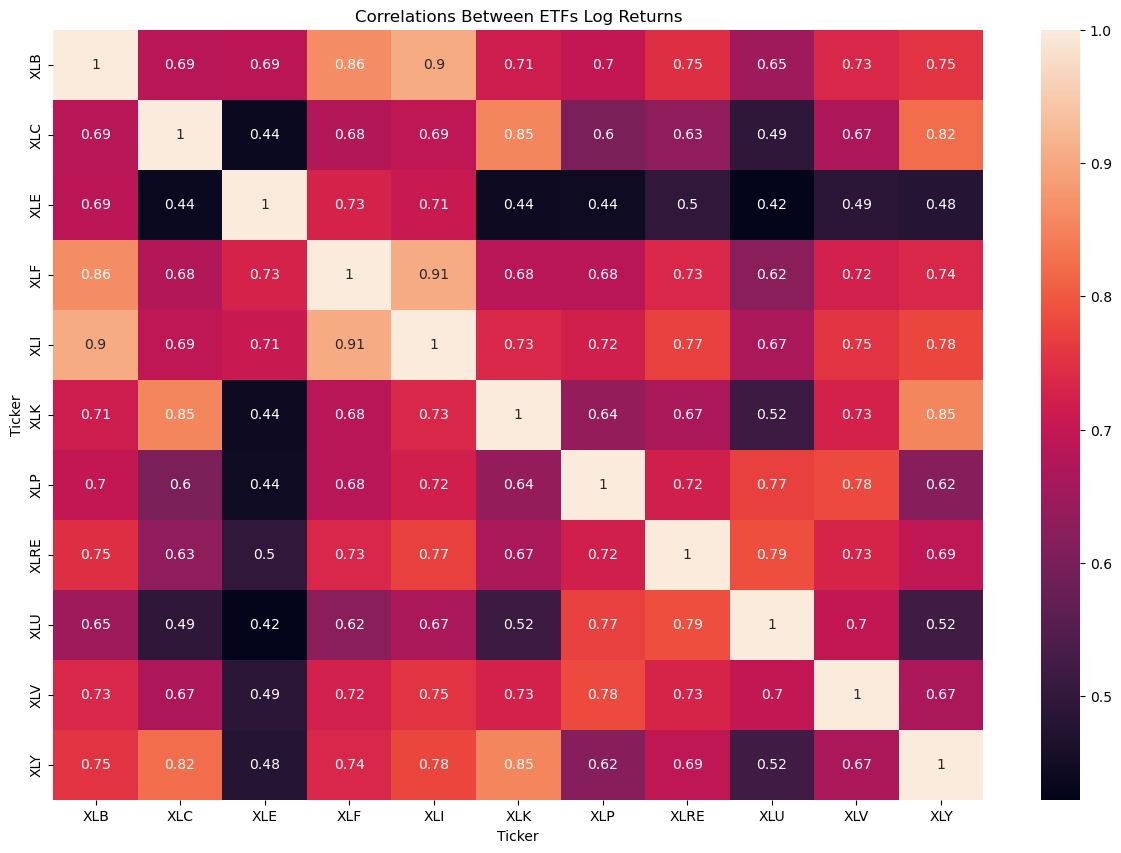

In [12]:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(etfLogRetList.corr(),annot=True)
plt.title("Correlations Between ETFs Log Returns") 
#XLK and XLV have a correlation value of 0.73; almost strong positive correlation, bad hedge

##  Evaluating Portfolio Risks

In [15]:

ASSET_TICKER = 'BRK-A'     
TAU = 5             # duration span (in years) of observed data



In [16]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
# storing adjusted stock prices into a variable 
assetPx = yf.download(ASSET_TICKER, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()

[*********************100%%**********************]  1 of 1 completed


b) Visualize a histogram for the asset's log returns. Describe its mean, standard deviation, and shape.

Text(0, 0.5, 'Density')

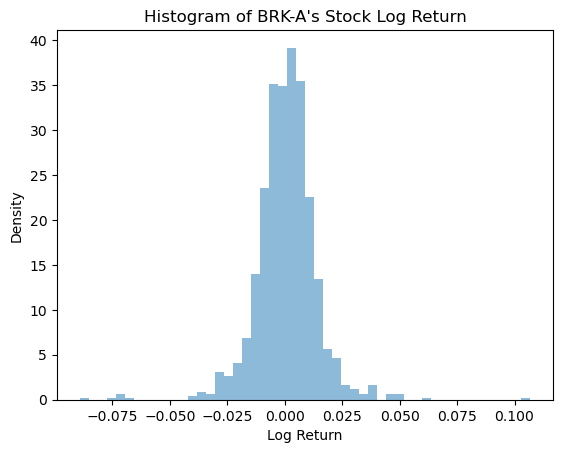

In [19]:
################ EDIT CODE LINES HERE #################
_, bins, _= plt.hist(assetLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + ASSET_TICKER + "'s Stock Log Return")
plt.xlabel("Log Return")
plt.ylabel("Density")
###################################################

Visually looking at the graph, the mean is centered around 0. The distribution is relatively narrow and concentrated around the mean, suggesting a smaller standard deviation which is maybe around 0.0100. The shape of the graph is relatively normal (bell-shaped), with a peak at the center and almost symmetrical on both sides. However, there are slight tails on the left and right, indicating some skewness.


In [23]:
assetLogRet.mean()

0.0006124331765671983

In [24]:
assetLogRet.std()

0.013193306219454312

In [25]:
assetLogRet.skew()

-0.23307904858525855

In [31]:
assetLogRet.kurtosis()

8.89763420958033

Based on the numbers, the BRK-A asset has a mean of 0.0006124331765671983 which is almost 0, a small standard deviation of 0.013193306219454312, a negative skewness indicating it is left-skewed, and a kurtosis value of 8.89763420958033, indicating that the log return tail values are thicker than normal

In [39]:
from fitter import Fitter

threshold = np.quantile(assetLogRet, 0.9) # Determine threshold to limit log returns
exceedances = assetLogRet[assetLogRet > threshold] # Limit log returns beyond the threshold

# Declare distributions to fit
f1 = Fitter(assetLogRet, distributions=["norm", "t", "laplace", "gennorm"])
f1.fit(max_workers=1)
sum1 = f1.summary(plot=False) #store distribution

f2 = Fitter(exceedances, distributions=["pareto", "genpareto"])
f2.fit(max_workers=1)
sum2 = f2.summary(plot=False)

distr_performance = pd.concat([sum1, sum2])[['sumsquare_error', 'aic', 'bic']]
distr_performance = distr_performance.sort_values(by=['sumsquare_error']) # Sort by sumsquare error in ascending order

distr_performance


2024-07-19 02:12:59.739 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=866.446948)
2024-07-19 02:12:59.832 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=232.460619)
2024-07-19 02:12:59.834 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted laplace distribution with error=686.927187)
2024-07-19 02:12:59.849 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gennorm distribution with error=546.482561)
2024-07-19 02:12:59.855 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted pareto distribution with error=8925.073763)
2024-07-19 02:12:59.912 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted genpareto distribution with error=10716.949611)


,sumsquare_error,aic,bic
t,232.460619,206.973806,222.380868
gennorm,546.482561,344.751742,360.158804
laplace,686.927187,282.614104,292.885479
norm,866.446948,1206.328827,1216.600202
pareto,8925.073763,-80.581830,-72.072984
genpareto,10716.949611,39.321705,47.830550


The Student-T distribution best fits the log returns.

Based on the data, the Student-t distribution has the lowest sum square error and relatively low aic and bic values compared to the other models. Although the pareto and genpareto have negative AIC and BIC values, their sum square error value is extremely large indicating it is a poorer fitting model.

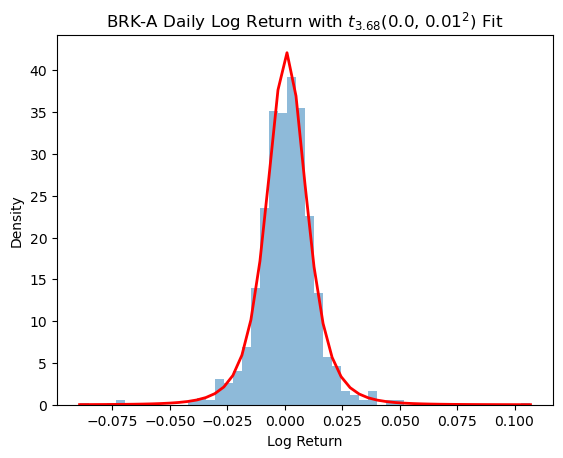

In [46]:
fig = plt.figure()
shape_t, loc_t, scale_t = stats.t.fit(assetLogRet) # shape, location, and scale estimates
ax1 = fig.add_subplot(111
                      , title=ASSET_TICKER + " Daily Log Return with $t_{"
                          +str(round(shape_t, 2))+"}$"
                          +"("+str(round(loc_t, 2))
                          +', '
                          + str(round(scale_t, 2))+"$^{2}$) Fit"
                      , xlabel='Log Return'
                      , ylabel='Density')
_, bins, _= ax1.hist(assetLogRet, bins=50, density=1, alpha=0.5) 
fitted_t = stats.t.pdf(bins, shape_t, loc_t, scale_t)
ax1.plot(bins, fitted_t, label='Student-t PDF', color = 'r', lw=2.)

The Student-t distribution captures the peak and from the looks of it, most of the tails values. However, on the +- 0.030 mark, the Student-t isn't able to capture as much. To understand the tail values, a QQ plot is needed

Text(0, 0.5, 'Sample quantiles')

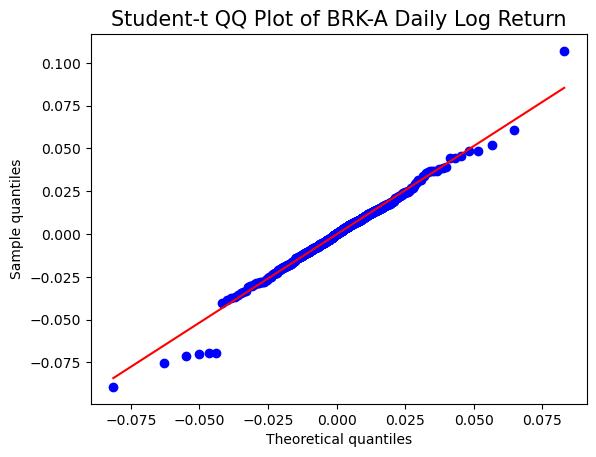

In [47]:
fig = plt.figure()
qq_t = stats.probplot(assetLogRet, dist = 't', sparams= (shape_t, loc_t, scale_t), plot = plt, fit = True)
plt.title('Student-t QQ Plot of ' + ASSET_TICKER + ' Daily Log Return', size=15)
plt.ylabel('Sample quantiles')

Because the points in the central region lie closely along the red y=x line, it means that the distribution of daily log returns of BRK-A matches well with the Student-t distribution. However, the tail value points deviate from the red line. The left tail seems relatively light which means their is a lower chance of seeing negtaive extreme log returns. The right tail seems to have heavier right tail meaning their is a higher probability of seeing positve extreme log returns. 

In [49]:
print("shape: " + str(shape_t))
print("location: " +str(loc_t))
print("scale: " + str(scale_t))


shape: 3.680992571971332
location: 0.0007986380614936671
scale: 0.008858836554097683


The probability distribution I selected was the Student-T distribution. The Shape is 3.680992571971332, the location parameter was set to 0.0007986380614936671 or ~0.0, and the scale is 0.008858836554097683.

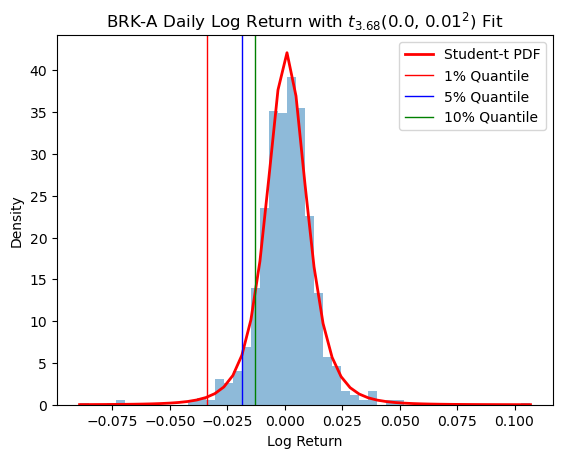

In [53]:
quantile_1 = stats.t.ppf(0.01, shape_t, loc_t, scale_t) # 1%
quantile_5 = stats.t.ppf(0.05, shape_t, loc_t, scale_t) # 5%
quantile_10 = stats.t.ppf(0.1, shape_t, loc_t, scale_t) # 10%

fig = plt.figure()
shape_t, loc_t, scale_t = stats.t.fit(assetLogRet) # shape, location, and scale estimates
ax1 = fig.add_subplot(111
                      , title=ASSET_TICKER + " Daily Log Return with $t_{"
                          +str(round(shape_t, 2))+"}$"
                          +"("+str(round(loc_t, 2))
                          +', '+ str(round(scale_t, 2))+"$^{2}$) Fit"
                      , xlabel='Log Return'
                      , ylabel='Density')
_, bins, _= ax1.hist(assetLogRet, bins=50, density=1, alpha=0.5) # log returns histogram
fitted_t = stats.t.pdf(bins, shape_t, loc_t, scale_t) # generate theoretical student-t pdf
ax1.plot(bins, fitted_t, label='Student-t PDF', color = 'r', lw=2.) # plot theoretical student-t pdf over histogram
# Plotting rVaR at 1%, 5%, 10% significance levels
ax1.axvline(quantile_1, color='red', linewidth=1, label='1% Quantile') # 1% cutoff
ax1.axvline(quantile_5, color='blue', linewidth=1, label='5% Quantile') # 5% cutoff
ax1.axvline(quantile_10, color='green', linewidth=1, label='10% Quantile') # 10% cutoff
ax1.legend()

In [55]:
rVaR_1 = -(np.exp(quantile_1)-1) # 1% rVaR
rVaR_5 = -(np.exp(quantile_5)-1) # 5% rVaR
rVaR_10 = -(np.exp(quantile_10)-1) # 10% rVaR

riskTable = pd.DataFrame({'Significance Level': ['1%', '5%', '10%']
                         , 'Quantile': [quantile_1, quantile_5, quantile_10]
                         , 'rVaR': [rVaR_1, rVaR_5, rVaR_10]})
riskTable

,Significance Level,Quantile,rVaR
0,1%,-0.034042,0.033469
1,5%,-0.018567,0.018396
2,10%,-0.013015,0.012930


1% probability that BRK-A log return will lose at least 3.3469% in the next trading day.

5% probability that BRK-A log return will lose at least 1.8396% in the next trading day.

10% probability that BRK-A log return will lose at least 1.2930% in the next trading day.

In [57]:
import random
random.seed(10) # to reproduce the same simulation next time

# Monte Carlo simulation to generate 10 million daily losses
simLoss = -(np.exp(stats.t.rvs(df=shape_t, loc=loc_t, scale=scale_t, size=1000000))-1)
rES_1 = np.mean(simLoss[simLoss>rVaR_1]) # 1% rES
rES_5 = np.mean(simLoss[simLoss>rVaR_5]) # 5% rES
rES_10 = np.mean(simLoss[simLoss>rVaR_10]) # 10% rES
riskTable['rES'] = [rES_1, rES_5, rES_10]
riskTable


,Significance Level,Quantile,rVaR,rES
0,1%,-0.034042,0.033469,0.047571
1,5%,-0.018567,0.018396,0.028342
2,10%,-0.013015,0.012930,0.021858


In a scenario where someone is planning to invest $95000 into the stock above, they wants to know at least how much (in dollar amount) they have to set aside to sustain the loss that occurrs at a 10% significance level. 

On average, how much (in dollar amount) of the portfolio should they size in to sustain the loss that occurrs at a 5% significance level.